## 数据划分

<class 'pandas.core.frame.DataFrame'>
(149, 5)
     sepal length  sepal width  petal length  petal width           class
0             4.9          3.0           1.4          0.2     Iris-setosa
1             4.7          3.2           1.3          0.2     Iris-setosa
2             4.6          3.1           1.5          0.2     Iris-setosa
3             5.0          3.6           1.4          0.2     Iris-setosa
4             5.4          3.9           1.7          0.4     Iris-setosa
..            ...          ...           ...          ...             ...
144           6.7          3.0           5.2          2.3  Iris-virginica
145           6.3          2.5           5.0          1.9  Iris-virginica
146           6.5          3.0           5.2          2.0  Iris-virginica
147           6.2          3.4           5.4          2.3  Iris-virginica
148           5.9          3.0           5.1          1.8  Iris-virginica

[149 rows x 5 columns]
5.8483221476510066
50
(149, 5)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_35424\1776670748.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris['class'][iris['class']=='Iris-setosa']=1


<Axes: ylabel='Frequency'>

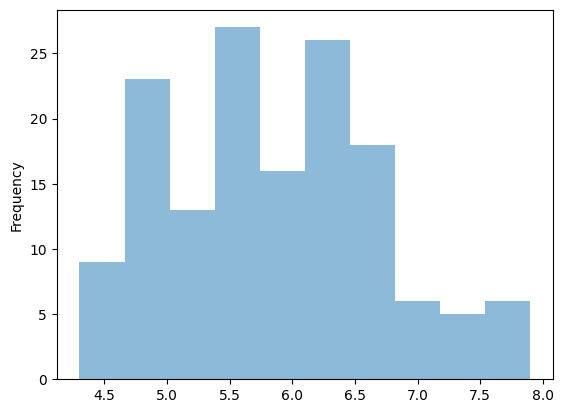

In [45]:
from numpy import genfromtxt
import pandas as pd 
# 数据读取
# iris = genfromtxt('E:\\Projects\\math5836\\week1\\linear_regression\\raw_data\\iris.data')
iris = pd.read_csv('E:\\Projects\\math5836\\week1\\linear_regression\\raw_data\\iris.data')
print(type(iris))
iris.columns = ['sepal length','sepal width','petal length','petal width','class']
print(iris.shape)
print(iris)
iris['class'][iris['class']=='Iris-setosa']=1


print(iris['sepal length']/iris['sepal length'].max())
print(iris['class'][iris['class']=='Iris-virginica'].shape[0])
print(iris.shape)
# iris['sepal length'].plot.hist(bins=10,alpha=0.5)




In [37]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris[['sepal length','sepal width','petal length','petal width']], iris['class'], test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:,:3], iris[:,4], test_size=0.33, random_state=42)

print(X_train.shape)
print(X_test.shape)

(99, 3)
(50, 3)


In [ ]:
 # -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from numpy import dot
from numpy.linalg import inv

def logit(x):
     return 1./(1+np.exp(-x))
# 批量梯度下降法
m,n = X_train.shape #矩阵大小
alpha = 0.0065 #设定学习速率
theta_g = np.zeros((n,1)) #初始化参数
maxCycles = 3000 #迭代次数
J = pd.Series(np.arange(maxCycles, dtype = float)) #损失函数
for i in range(maxCycles):
    h = logit(dot(X_train, theta_g)) #估计值  
    J[i] = -(1/100.)*np.sum(y_train*np.log(h)+(1-y_train)*np.log(1-h)) #计算损失函数值      
    error = h - y_train #误差
    grad = dot(y_train.T, error) #梯度
    theta_g -= alpha * grad

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

# 生成数据并切分
X_all, y_all = datasets.make_regression(n_samples=50, n_features=50, n_informative=10)
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, train_size=0.5)

# 创建模型并拟合
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# 创建损失计算函数 SSE
def sse(resid):
    return np.sum(resid**2)

# 训练损失和预测损失
resid_train = y_train - model.predict(X_train)
sse_train = sse(resid_train)
resid_test = y_test - model.predict(X_test)
sse_test = sse(resid_test)
print('train sse:', sse_train, 'test sse:', sse_test)

train sse: 1.6285780952798118e-24 test sse: 647870.3448382973


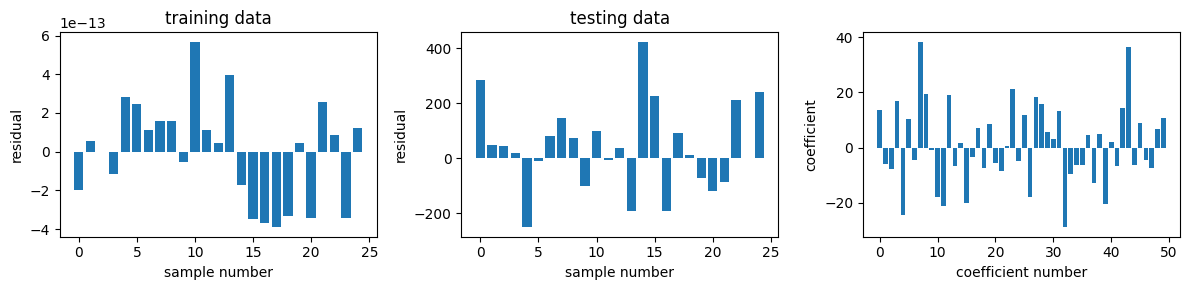

In [41]:
def plot_residuals_and_coeff(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("sample number")
    axes[0].set_ylabel("residual")
    axes[0].set_title("training data")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("sample number")
    axes[1].set_ylabel("residual")
    axes[1].set_title("testing data")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("coefficient number")
    axes[2].set_ylabel("coefficient")
    fig.tight_layout()
    return fig, axes
fig, ax = plot_residuals_and_coeff(resid_train, resid_test, model.coef_)
plt.show()